# Figure 9

Convergence of efficiency for $N\,{=}\,6$ and $\mu\,{=}\,0.5$.  Optimal model parameters were identified for each information level via Bayesian optimization.  The curve displays the rolling average efficiency per round (window $w\,{=}\,10$) over 100 independent simulations.

In [25]:
import sys
sys.path.append("../src/")

import warnings
warnings.filterwarnings("ignore")

In [26]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from Config.config import PATHS
from Utils.interaction import Performer
from Utils.indices import AlternationIndex
from Utils.utils import GetMeasurements, Grid
from Classes.cognitive_model_agents import MODELS

In [27]:
simulation_parameters = {
    'num_rounds': 500,
    'num_episodes': 100,
    'verbose': 0
}
fixed_parameters = {
    "num_agents": 6,
    "threshold": 0.5,
}

df_parameters = pd.read_csv(PATHS['simulated_data'] / 'optimal_parameters.csv')

In [28]:
def get_free_parameters(df, name):
    free_parameters = df[df['model'] == name]['params']
    free_parameters = free_parameters.values[0]
    free_parameters = free_parameters.replace("'", '"')
    free_parameters = free_parameters.replace("np.float64(", "")
    free_parameters = free_parameters.replace(")", "")
    free_parameters = json.loads(free_parameters)
    return free_parameters    

def get_model_from_name(name):
    for model in MODELS:
        if model.name() == name:
            return model
    raise Exception(f"Error: No model found for name {name}")

def create_data(my_models):
    df_list = []
    for model_name in my_models:
        model = get_model_from_name(model_name)
        free_parameters = get_free_parameters(df_parameters, model_name)
        df = Performer.sim(
            agent_class=model,
            fixed_parameters=fixed_parameters,
            free_parameters=free_parameters,
            simulation_parameters=simulation_parameters
        )
        df["model"] = model_name
        if 'FRA' not in model_name:
            df["information_level"] = model_name.split('-')[-1]
        else:
            df["information_level"] = 'N/A'
        df_list.append(df)

    df = pd.concat(df_list, ignore_index=True)
    return df

### Data for WSLS

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

<Axes: xlabel='round', ylabel='roll_score'>

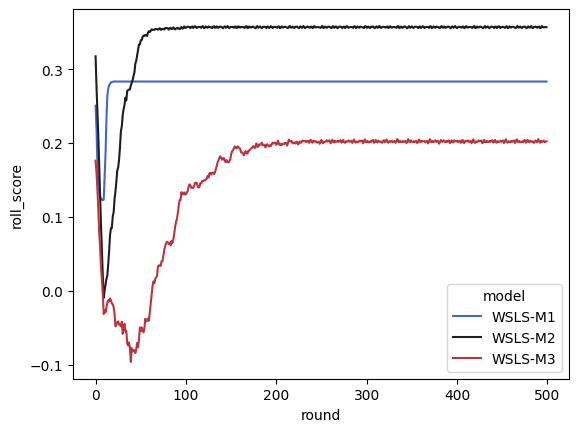

In [29]:
my_models_WSLS = ['WSLS-M1', 'WSLS-M2', 'WSLS-M3']

raw_df_WSLS = create_data(my_models_WSLS)
df_WSLS = raw_df_WSLS.groupby(['model', 'information_level', 'id_sim', 'round'])['score'].mean().reset_index(name='score')
df_WSLS['roll_score'] = df_WSLS['score'].rolling(window=10).mean()

sns.lineplot(
    x='round', y='roll_score',
    hue='model', errorbar=None,
    data=df_WSLS, palette='icefire'
)

### Data for Markov Fictitious Play

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

<Axes: xlabel='round', ylabel='roll_score'>

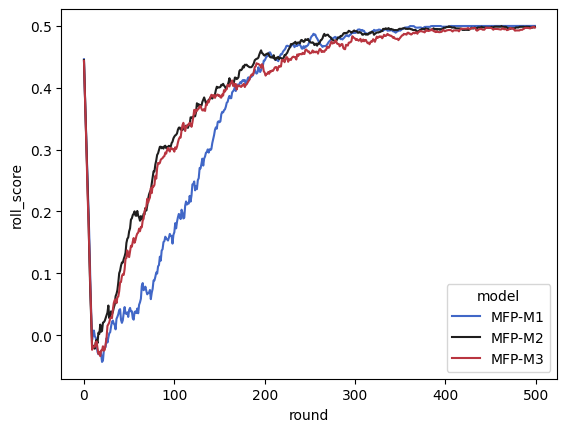

In [30]:
my_models_MFP = ['MFP-M1', 'MFP-M2', 'MFP-M3']

raw_df_MFP = create_data(my_models_MFP)
df_MFP = raw_df_MFP.groupby(['model', 'information_level', 'id_sim', 'round'])['score'].mean().reset_index(name='score')
df_MFP['roll_score'] = df_MFP['score'].rolling(window=10).mean()

sns.lineplot(
    x='round', y='roll_score',
    hue='model', errorbar=None,
    data=df_MFP, palette='icefire'
)

### Data for Available Space model

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

<Axes: xlabel='round', ylabel='roll_score'>

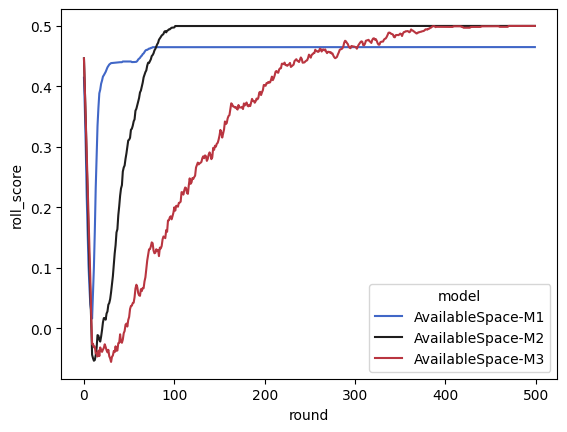

In [31]:
my_models_AvailableSpace = ['AvailableSpace-M1', 'AvailableSpace-M2', 'AvailableSpace-M3']

raw_df_AvailableSpace = create_data(my_models_AvailableSpace)
df_AvailableSpace = raw_df_AvailableSpace.groupby(['model', 'information_level', 'id_sim', 'round'])['score'].mean().reset_index(name='score')
df_AvailableSpace['roll_score'] = df_AvailableSpace['score'].rolling(window=10).mean()

sns.lineplot(
    x='round', y='roll_score',
    hue='model', errorbar=None,
    data=df_AvailableSpace, palette='icefire'
)

### Data for Payoff

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

<Axes: xlabel='round', ylabel='roll_score'>

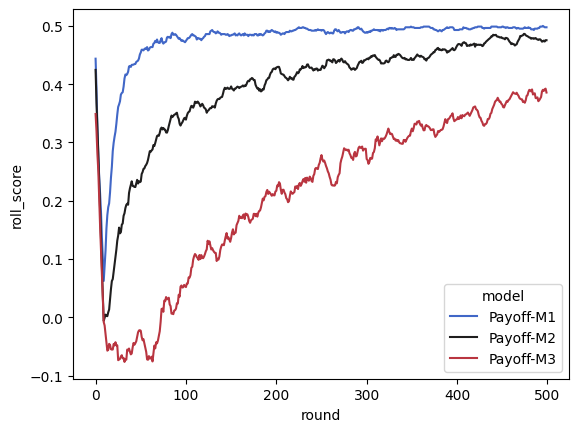

In [32]:
my_models_Payoff = ['Payoff-M1', 'Payoff-M2', 'Payoff-M3']

raw_df_Payoff = create_data(my_models_Payoff)
df_Payoff = raw_df_Payoff.groupby(['model', 'information_level', 'id_sim', 'round'])['score'].mean().reset_index(name='score')
df_Payoff['roll_score'] = df_Payoff['score'].rolling(window=10).mean()

sns.lineplot(
    x='round', y='roll_score',
    hue='model', errorbar=None,
    data=df_Payoff, palette='icefire'
)

### Data for Payoff + Attendance

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

<Axes: xlabel='round', ylabel='roll_score'>

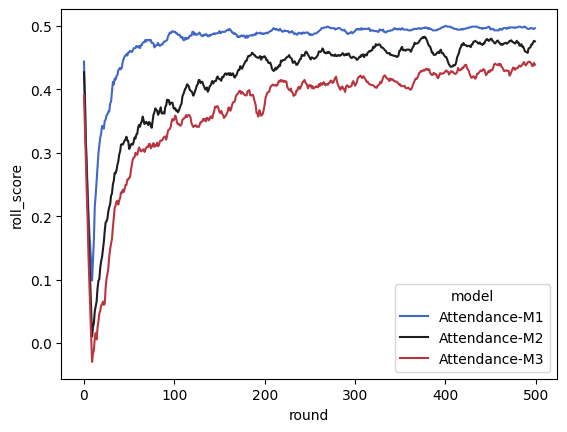

In [33]:
my_models_Attendance = ['Attendance-M1', 'Attendance-M2', 'Attendance-M3']

raw_df_Attendance = create_data(my_models_Attendance)
df_Attendance = raw_df_Attendance.groupby(['model', 'information_level', 'id_sim', 'round'])['score'].mean().reset_index(name='score')
df_Attendance['roll_score'] = df_Attendance['score'].rolling(window=10).mean()

sns.lineplot(
    x='round', y='roll_score',
    hue='model', errorbar=None,
    data=df_Attendance, palette='icefire'
)

### Data for Payoff + Fairness

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

<Axes: xlabel='round', ylabel='roll_score'>

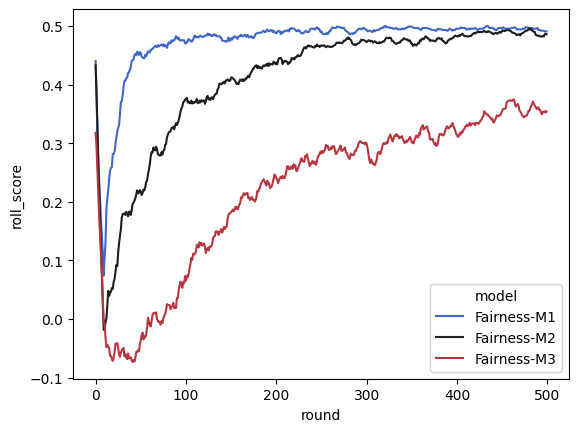

In [34]:
my_models_Fairness = ['Fairness-M1', 'Fairness-M2', 'Fairness-M3']

raw_df_Fairness = create_data(my_models_Fairness)
df_Fairness = raw_df_Fairness.groupby(['model', 'information_level', 'id_sim', 'round'])['score'].mean().reset_index(name='score')
df_Fairness['roll_score'] = df_Fairness['score'].rolling(window=10).mean()

sns.lineplot(
    x='round', y='roll_score',
    hue='model', errorbar=None,
    data=df_Fairness, palette='icefire'
)

### Figure

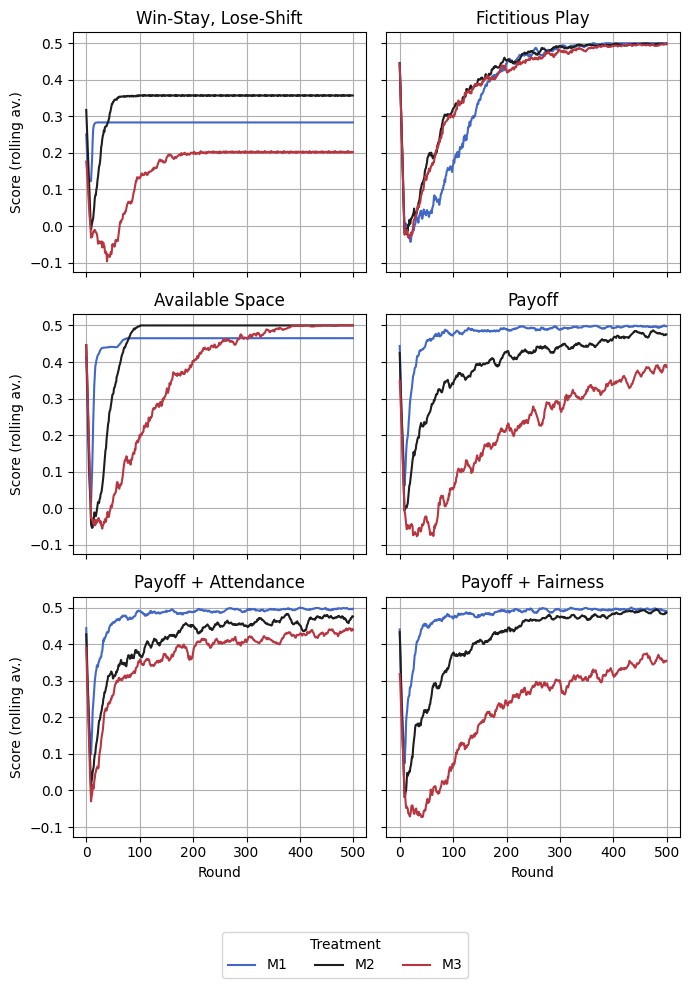

In [35]:
grid = Grid(6, vertical=True)
my_data = [
    df_WSLS, df_MFP, df_AvailableSpace,
    df_Payoff, df_Attendance, df_Fairness
]
model_names = [
    'Win-Stay, Lose-Shift', 'Fictitious Play', 'Available Space',
    'Payoff', 'Payoff + Attendance', 'Payoff + Fairness'
]

fig, axes = plt.subplots(
    grid.rows, grid.cols,
    figsize=(grid.cols * 3.5, grid.rows * 3),
    tight_layout=True,
    sharex=True, sharey=True
)

for f, c in grid:
    idx = grid.pair_to_index(f, c)
    data = my_data[idx]
    sns.lineplot(
        x='round', y='roll_score',
        hue='information_level', hue_order=['M1', 'M2', 'M3'],
        errorbar=None,
        data=data, palette='icefire',
        ax=axes[f, c]
    )
    name = model_names[idx]
    axes[f, c].set_title(name)
    axes[f, c].set_xlabel('Round')
    axes[f, c].set_ylabel('Score (rolling av.)')
    axes[f, c].legend().remove()
    axes[f, c].grid()

handles, labels = axes[0, 1].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Treatment',
    loc='lower center', 
    bbox_to_anchor=(.5, -0.1),
    ncol=3
)

In [40]:
fig.savefig(PATHS['figures_for_paper'] / 'Figure9.png', dpi=300, bbox_inches='tight')

---

### Alternation table

In [37]:
df = pd.concat([
    raw_df_WSLS, raw_df_MFP, raw_df_AvailableSpace, 
    raw_df_Payoff, raw_df_Attendance, raw_df_Fairness,
], ignore_index=True)
gm = GetMeasurements(df, ['bounded_efficiency', 'inequality'])
idx = AlternationIndex.from_file()
df = gm.get_measurements()
df = idx.alt_precentage(df, columns=['model']).reset_index()
df['alternation_percentage'] = df['alternation_percentage'] * 100
df['model'] = df['model'].apply(lambda x: x if '-' in x else x+'-M1')
df['information_level'] = df['model'].apply(lambda x: x.split('-')[1])
df['model_type'] = df['model'].apply(lambda x: x.split('-')[0])
alt_table = pd.pivot_table(
    data=df,
    index=['model_type'],
    values=['alternation_percentage'],
    columns=['information_level']
).fillna('-')

In [38]:
alt_table

alternation_percentage           
information_level                     M1   M2    M3
model_type                                         
Attendance                           0.0  4.0  19.0
AvailableSpace                       0.0  0.0   3.0
Fairness                             0.0  1.0   0.0
MFP                                  0.0  1.0   5.0
Payoff                               0.0  2.0   0.0
WSLS                                 0.0  0.0   0.0

In [39]:
print(alt_table.to_latex())

\begin{tabular}{lrrr}
\toprule
 & \multicolumn{3}{r}{alternation_percentage} \\
information_level & M1 & M2 & M3 \\
model_type &  &  &  \\
\midrule
Attendance & 0.000000 & 4.000000 & 19.000000 \\
AvailableSpace & 0.000000 & 0.000000 & 3.000000 \\
Fairness & 0.000000 & 1.000000 & 0.000000 \\
MFP & 0.000000 & 1.000000 & 5.000000 \\
Payoff & 0.000000 & 2.000000 & 0.000000 \\
WSLS & 0.000000 & 0.000000 & 0.000000 \\
\bottomrule
\end{tabular}



---